# Pair Programming EDA
Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

## Objetivos

Buscar un conjunto de datos a analizar

Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

Interpretación de los resultados.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sidetable

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 25

In [3]:
df = pd.read_csv('datos/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.shape

(129880, 23)

In [5]:
df.stb.missing()

,missing,total,percent
Arrival Delay in Minutes,393,129880,0.302587
Inflight entertainment,0,129880,0.000000
Departure Delay in Minutes,0,129880,0.000000
Online boarding,0,129880,0.000000
Cleanliness,0,129880,0.000000
Checkin service,0,129880,0.000000
Baggage handling,0,129880,0.000000
Leg room service,0,129880,0.000000
On-board service,0,129880,0.000000
Ease of Online booking,0,129880,0.000000


Comprobamos si tenemos duplicados.

In [6]:
df.duplicated().sum()

0

Eliminamos los nulos, que suponen solo el 0.3% de los datos.

In [7]:
df.shape

(129880, 23)

In [8]:
df.dropna(subset= ["Arrival Delay in Minutes"], how = "any", inplace = True)

In [9]:
df.shape

(129487, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,6951.0
Seat comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
Online support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0


In [12]:
df.describe(include="object").T

,count,unique,top,freq
satisfaction,129487,2,satisfied,70882
Gender,129487,2,Female,65703
Customer Type,129487,2,Loyal Customer,105773
Type of Travel,129487,2,Business travel,89445
Class,129487,3,Business,61990


In [13]:
df.groupby("satisfaction").median()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,
dissatisfied,36.0,1954.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,0.0,0.0
satisfied,42.0,1885.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0


Cambiamos el tipo a las variables categóricas.

In [14]:
df.columns.to_list()

['satisfaction',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [15]:
columnas_categoria = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service',
 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for i in columnas_categoria:
    df[i] = df[i].astype("category")

In [16]:
df.dtypes

satisfaction                           object
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Seat comfort                         category
Departure/Arrival time convenient    category
Food and drink                       category
Gate location                        category
Inflight wifi service                category
Inflight entertainment               category
Online support                       category
Ease of Online booking               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Cleanliness                          category
Online boarding                      category
Departure Delay in Minutes        

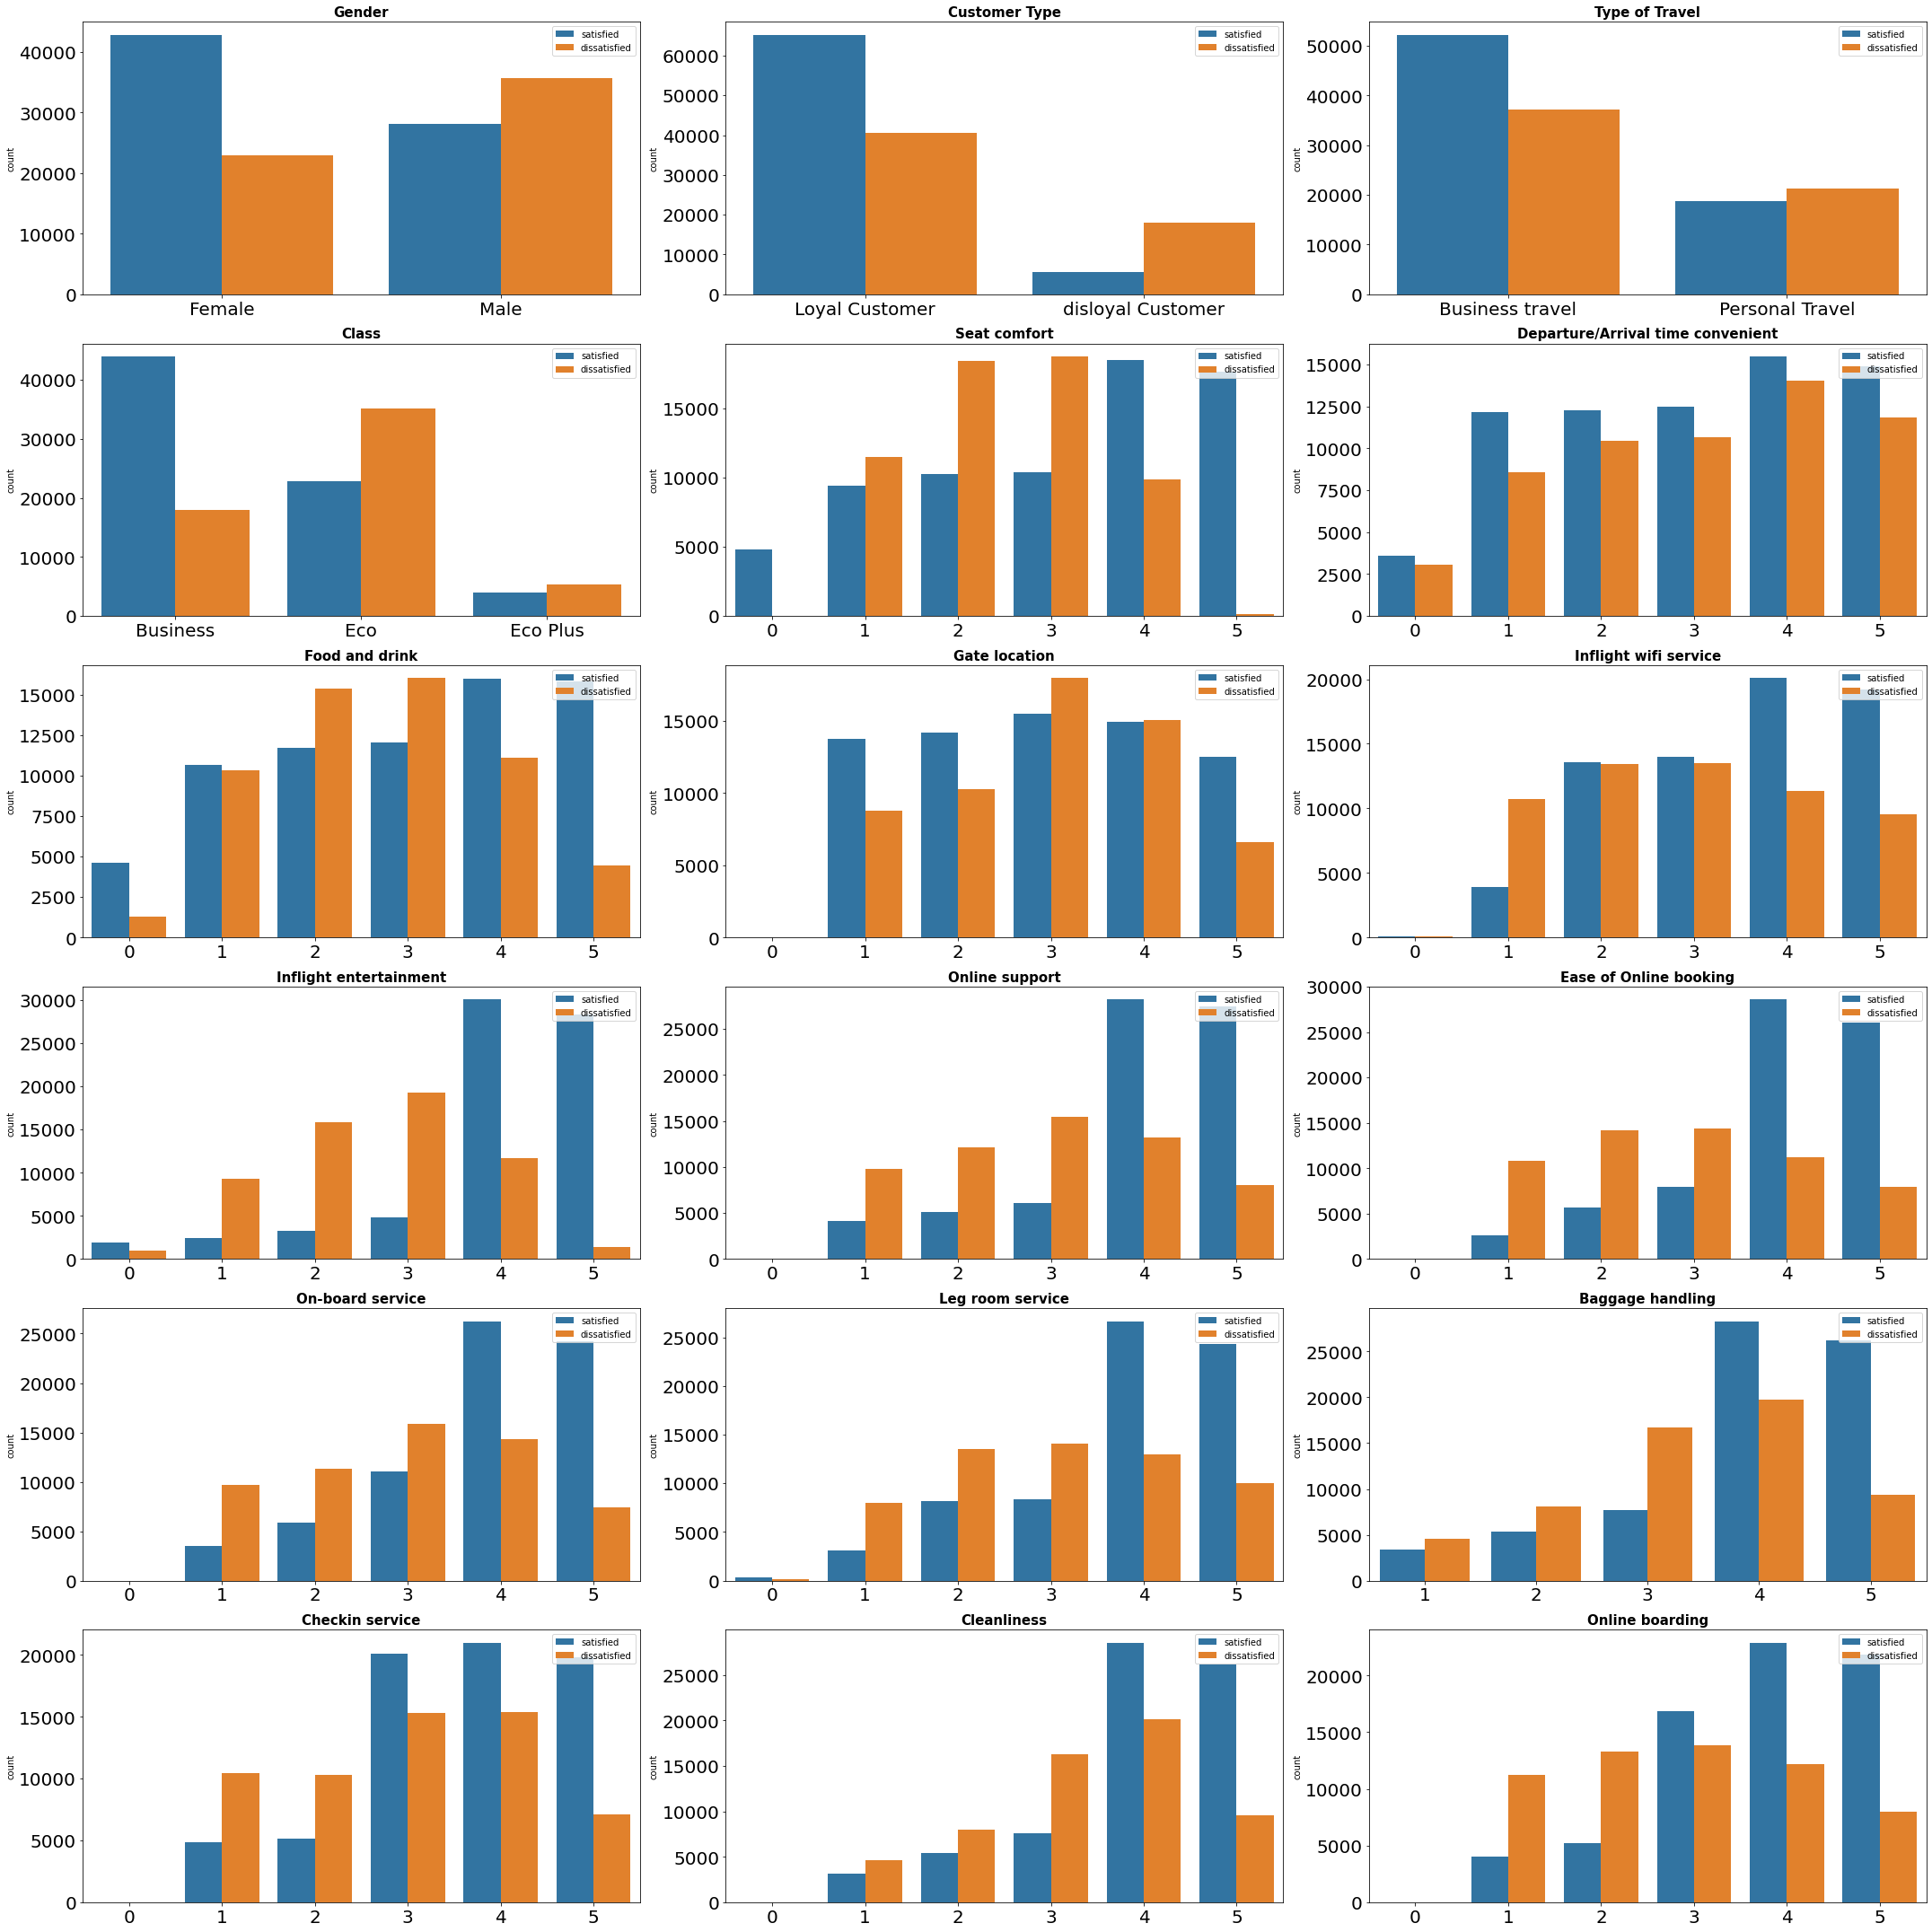

In [17]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 30))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "category").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();